In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model

Base = automap_base()
# reflect the tables

Base.prepare(engine, reflect = True)

In [8]:
# We can view all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table

# measurement table

measurement = Base.classes.measurement

# station table

station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB

session = Session(engine)

In [17]:
# check for table names through inspector

inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [19]:
# column name check (measurement)

measurement_col = inspector.get_columns('measurement')
for col in measurement_col:
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [20]:
# column name check (station)

station_col = inspector.get_columns('station')
for col in station_col:
    print(col['name'], col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [21]:
# find the most recent date in resource to have one date of the 1-year analysis

session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

date = dt.datetime(2016, 8, 23)

In [23]:
# Perform a query to retrieve the data and precipitation scores

data_precip = session.query(measurement.prcp, measurement.date).filter(measurement.date > date).all()

In [30]:
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

results = [{'Date' : d_p[1], 'Precipitation (Inches)' : d_p[0]} for d_p in data_precip]

results

[{'Date': '2016-08-24', 'Precipitation (Inches)': 0.08},
 {'Date': '2016-08-25', 'Precipitation (Inches)': 0.08},
 {'Date': '2016-08-26', 'Precipitation (Inches)': 0.0},
 {'Date': '2016-08-27', 'Precipitation (Inches)': 0.0},
 {'Date': '2016-08-28', 'Precipitation (Inches)': 0.01},
 {'Date': '2016-08-29', 'Precipitation (Inches)': 0.0},
 {'Date': '2016-08-30', 'Precipitation (Inches)': 0.0},
 {'Date': '2016-08-31', 'Precipitation (Inches)': 0.13},
 {'Date': '2016-09-01', 'Precipitation (Inches)': 0.0},
 {'Date': '2016-09-02', 'Precipitation (Inches)': 0.0},
 {'Date': '2016-09-03', 'Precipitation (Inches)': 0.0},
 {'Date': '2016-09-04', 'Precipitation (Inches)': 0.03},
 {'Date': '2016-09-05', 'Precipitation (Inches)': None},
 {'Date': '2016-09-06', 'Precipitation (Inches)': None},
 {'Date': '2016-09-07', 'Precipitation (Inches)': 0.05},
 {'Date': '2016-09-08', 'Precipitation (Inches)': 0.0},
 {'Date': '2016-09-09', 'Precipitation (Inches)': 0.03},
 {'Date': '2016-09-10', 'Precipitation 

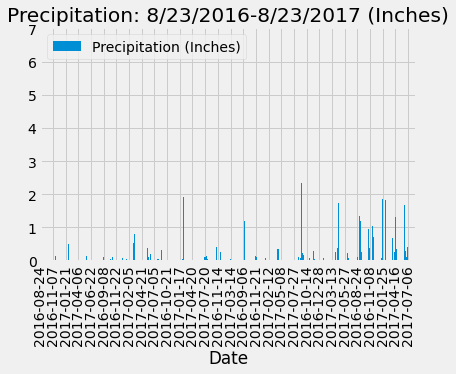

In [36]:
# Use Pandas Plotting with Matplotlib to plot the data

pd.DataFrame(results).set_index('Date').plot.bar()
plt.locator_params(axis='x', nbins=30)
plt.title('Precipitation: 8/23/2016-8/23/2017 (Inches)')
plt.xticks(rotation=90)
plt.show()

In [37]:
# save bar plot figure

plt.savefig('precipitation --- 8.23.16-8.23.17.png')

<Figure size 432x288 with 0 Axes>

In [38]:
# Use Pandas to calcualte the summary statistics for the precipitation data

pd.DataFrame(results).describe()

,Precipitation (Inches)
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [39]:
# Design a query to show how many stations are available in this dataset?

station_count = session.query(measurement).group_by(measurement.station).count()

In [40]:
# show station count

print(station_count)

9


In [57]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_activity = session.query(measurement.station, func.count(measurement.station).label('number'))\
                    .group_by(measurement.station).all()

In [58]:
for s_a in station_activity:
    print(s_a.station, s_a.number)

USC00511918 1979
USC00513117 2709
USC00514830 2202
USC00516128 2612
USC00517948 1372
USC00518838 511
USC00519281 2772
USC00519397 2724
USC00519523 2669


In [60]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# station with most temperature observations (tobs) = USC00519281 

selection = [measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]

In [62]:
tobs = session.query(*selection).filter(func.strftime('%Y',measurement.date) == '2016')\
            .filter(measurement.station == 'USC00519281').group_by(measurement.station)\
            .order_by(measurement.station).all()

In [63]:
tobs

[('USC00519281', 56.0, 82.0, 73.10109289617486)]

In [64]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


date = dt.datetime(2016, 8, 23)

high_temp = session.query(measurement.tobs, measurement.station, measurement.date)\
                .filter(measurement.date > date).filter(measurement.station == 'USC00519281').all()

In [65]:
# show results

data = [{'Date' : h_t[1], 'Temp' : h_t[0]} for h_t in high_temp]
data

[{'Date': 'USC00519281', 'Temp': 77.0},
 {'Date': 'USC00519281', 'Temp': 80.0},
 {'Date': 'USC00519281', 'Temp': 80.0},
 {'Date': 'USC00519281', 'Temp': 75.0},
 {'Date': 'USC00519281', 'Temp': 73.0},
 {'Date': 'USC00519281', 'Temp': 78.0},
 {'Date': 'USC00519281', 'Temp': 77.0},
 {'Date': 'USC00519281', 'Temp': 78.0},
 {'Date': 'USC00519281', 'Temp': 80.0},
 {'Date': 'USC00519281', 'Temp': 80.0},
 {'Date': 'USC00519281', 'Temp': 78.0},
 {'Date': 'USC00519281', 'Temp': 78.0},
 {'Date': 'USC00519281', 'Temp': 78.0},
 {'Date': 'USC00519281', 'Temp': 73.0},
 {'Date': 'USC00519281', 'Temp': 74.0},
 {'Date': 'USC00519281', 'Temp': 80.0},
 {'Date': 'USC00519281', 'Temp': 79.0},
 {'Date': 'USC00519281', 'Temp': 77.0},
 {'Date': 'USC00519281', 'Temp': 80.0},
 {'Date': 'USC00519281', 'Temp': 76.0},
 {'Date': 'USC00519281', 'Temp': 79.0},
 {'Date': 'USC00519281', 'Temp': 75.0},
 {'Date': 'USC00519281', 'Temp': 79.0},
 {'Date': 'USC00519281', 'Temp': 78.0},
 {'Date': 'USC00519281', 'Temp': 79.0},


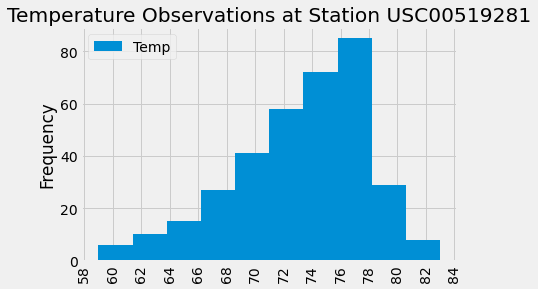

In [70]:
# plot above results in histogram format

pd.DataFrame(data).set_index('Date').plot.hist()
plt.locator_params(axis='x', nbins=15)
plt.title('Temperature Observations at Station USC00519281')
plt.xticks(rotation = 90)
plt.show()

In [80]:
# save bar plot figure

plt.savefig('temp observations --- USC00519281.png')

<Figure size 432x288 with 0 Axes>

## Bonus Challenge Assignment

In [116]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [117]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

prev_yr_start = dt.date(2017, 2, 17)
prev_yr_end = dt.date(2017, 2, 25)

tmin, tavg, tmax = calc_temps(prev_yr_start.strftime("%Y-%m-%d"), prev_yr_end.strftime("%Y-%m-%d"))[0]
print(tmin, tavg, tmax)

61.0 70.09615384615384 77.0


<ipython-input-118-9c4da0d17058>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


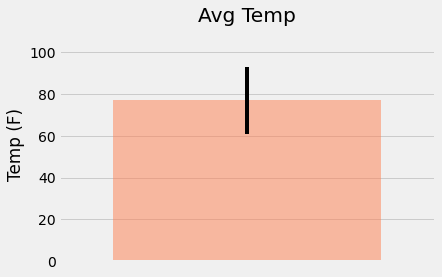

In [118]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots()
xpos = 1
yerr = tmax-tmin

bar = ax.bar(xpos, tmax, yerr=yerr, alpha=0.5, color='coral', align='center')
ax.set(xticks=range(xpos), xticklabels='x', title='Avg Temp', ylabel="Temp (F)")
ax.margins(.2,.2)

fig.show()

In [119]:
plt.savefig('Bonus 1 bar chart.png')

<Figure size 432x288 with 0 Axes>

In [120]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start = '2017-02-17'
end = '2018-02-25'

sel = [station.station, station.name, station.latitude, station.longitude, station.elevation, func.sum(measurement.prcp)]

results = session.query(*sel).filter(measurement.station == station.station)\
            .filter(measurement.date >= start)\
            .filter(measurement.date <= end)\
            .group_by(station.name).order_by(func.sum(measurement.prcp).desc()).all()

print(results)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 56.69000000000004), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 35.12999999999999), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 26.42), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 18.9), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 15.279999999999992), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 6.729999999999993), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 3.34)]


In [121]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [122]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start = '2017-01-01'
end = '2017-01-07'
# Use the start and end date to create a range of dates
dates = pd.date_range(start, end, freq='D')
# Stip off the year and save a list of %m-%d strings
month_dates = dates.strftime('%m-%d')
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for day in month_dates:
    normals.append(*daily_normals(day))
    
normals

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [123]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

dataframe = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'])
dataframe['date'] = dates
dataframe.set_index(['date'],inplace=True)
dataframe.head()

,tmin,tavg,tmax
date,,,
2017-01-01,62.0,69.153846,77.0
2017-01-02,60.0,69.396226,77.0
2017-01-03,62.0,68.909091,77.0
2017-01-04,58.0,70.000000,76.0
2017-01-05,56.0,67.964286,76.0


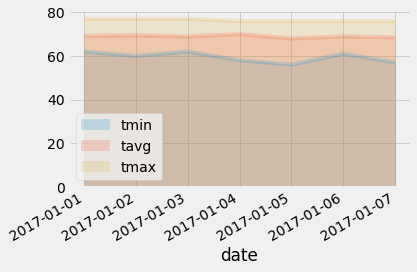

In [124]:
# Plot the daily normals as an area plot with `stacked=False`
dataframe.plot(kind='area', stacked=False, x_compat=True, alpha=.2)
plt.tight_layout()

In [125]:
plt.savefig('Bonus 2 area plot.png')

<Figure size 432x288 with 0 Axes>